In [1]:
from src.printGraph import draw_graph as draw_graph
from src.Graph import Graph
import src.triangleAlgorithms as TA
from test_ import HelperClass as HC

### Aufgabe 3 - Dreiecke

Algorithmen zum Aufzählen von Dreiecken. 
Hier haben wir uns an "Triangle Listing Algorithms: Back from the Diversion" von Mark Ortmann und Ulrik Brandes sowie "Algorithmic Aspects of Triangle-Based Network Analysis" von Thomas Schank orientiert.

Es wurden insgesamt 4 verschiedene Algorithmen implementiert. Zurückgegeben wird ein Tupel, wo der erste Wert die Anzahl an Dreiecken aus dem Graph zurückgibt. Der zweite Wert enthält die Aufzählung der Dreiecke als Liste.

Die ersten 2 Algorithmen benötigen die (internen) Knoten des Graphens nach Knotengrad sortiert. Dazu gehen wir die internal Ids durch und schauen uns jeweils den Knotengrad an. Dann sortieren wir den Knoten in ein Dictionary, wo der Key der Knotengrad ist und der Value alle Knotenids mit dem Knotengrad.

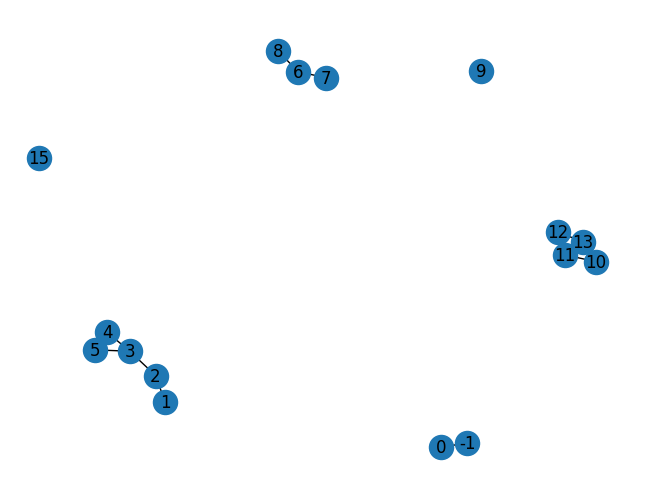

In [2]:
G, _, _ = HC.create_graph()
G.add_edge(11, 13)

draw_graph(G, True)

Algorithmus 1 - Node Iterator

Dieser Algorithmus wurde zum Vergleichen einmal ohne Knotenreihenfolge und einmal mit getestet.

ohne Knotenreihenfolge:
- Laufzeit: $O(n \cdot d_{max} ^2 ) \subseteq O(n^3)$

mit Knotenreihenfolge:
- Laufzeit: TODO

In [4]:
print(TA.algorithm_node_iterator_without_sorting(G))
print(TA.algorithm_node_iterator(G))
print(TA.algorithm_node_iterator_degeneracy_sorting(G))

(3, [['3', '4', '5'], ['10', '11', '13'], ['11', '12', '13']])
(3, [['3', '4', '5'], ['11', '10', '13'], ['11', '12', '13']])
(3, [['3', '4', '5'], ['12', '11', '13'], ['13', '10', '11']])


Algorithmus 2 - Chiba und Nishizeki (K3)

- Laufzeit: $O(n\cdot d_{max}^2) \subseteq O(n^3)$

In [13]:
print(TA.algorithm_chiba_and_nishizeki(G))

(3, [['3', '4', '5'], ['11', '10', '13'], ['11', '12', '13']])


Algorithmus 3 - Edge Iterator

- Laufzeit: $O(d_{max}\cdot m) \subseteq O(n\cdot m)$
- Speicheraufwand: $O(n^2)$

funktioniert folgendermaßen: 
1) Es wird die Adjazensmatrix des Graphens erstellt
2) Nun werden alle Knoten v der Reihe nach durchgegangen
3) Für jeden Knoten v werden seine Nachbarn n durchgegangen
4) Für jedes Paar v,n wird in der Adjazensmatrix die entsprechende Zeile genommen und der Index des ersten Eintrags der 1 ist gespeichert (j, k)
5) Solange $j \neq k$ wird der nächste Eintrag der auf 1 ist gesucht
6) Gilt $j=k$, so wird ein Dreieck ausgegeben und bis zum Ende der Zeile weiter gesucht

In [14]:
print(TA.algorithm_edge_iterator(G))

(3, [['3', '5', '4'], ['11', '13', '12'], ['10', '13', '11']])


Algorithmus 4 - ayz

Dieser Algorithmus ist nur in der Lage die Dreiecke zu zählen und kann sie nicht alle ausgeben
- Laufzeit: $O(m^{\frac{2\gamma}{\gamma + 1}}) \subseteq O(m^{1.41})$

In [16]:
print(TA.algorithm_triangle_counter_ayz(G, 2))
print(TA.algorithm_triangle_counter_ayz(G, 1))

(3, {'-1': 0, '0': 0, '1': 0, '2': 0, '3': 1.0, '4': 1.0, '5': 1.0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 1, '11': 2.0, '12': 1, '13': 2.0, '15': 0})
(3, {'-1': 0, '0': 0, '1': 0, '2': 0.0, '3': 1.0, '4': 1.0, '5': 1.0, '6': 0.0, '7': 0, '8': 0, '9': 0, '10': 1.0, '11': 2.0, '12': 1.0, '13': 2.0, '15': 0})
